In [90]:
import numpy as np
import matplotlib.pyplot as plt

In [91]:
import ipywidgets as widgets
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

In [92]:
# The maximum time duration for the simulation in seconds.
t_max = 150e-3 
# The time step size for the simulation in seconds.
dt = 1e-3 
# The membrane time constant of the neuron in seconds.
tau = 20e-3 
# The resting membrane potential (leak potential) in millivolts.
el = -60e-3 
# The reset potential (membrane potential after a spike) in millivolts.
vr = -70e-3 
# The threshold potential (membrane potential to trigger a spike) in millivolts.
vth = -50e-3
# The membrane resistance in ohms.
r = 100e6 
# The mean input current in amperes.
i_mean = 25e-11 

print(t_max, dt, tau, el, vr, vth, r, i_mean)

0.15 0.001 0.02 -0.06 -0.07 -0.05 100000000.0 2.5e-10


In [93]:
step_end = 10
v = el

for step in range(step_end):
    t = step * dt
    i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))
    v = v + dt/tau * (el - v + r*i)
    print(f"t: {t:.3f}\ti: {v:4e}")

t: 0.000	i: -5.875000e-02
t: 0.001	i: -5.682777e-02
t: 0.002	i: -5.454756e-02
t: 0.003	i: -5.238136e-02
t: 0.004	i: -5.077756e-02
t: 0.005	i: -4.998868e-02
t: 0.006	i: -4.997398e-02
t: 0.007	i: -5.041410e-02
t: 0.008	i: -5.083222e-02
t: 0.009	i: -5.077534e-02


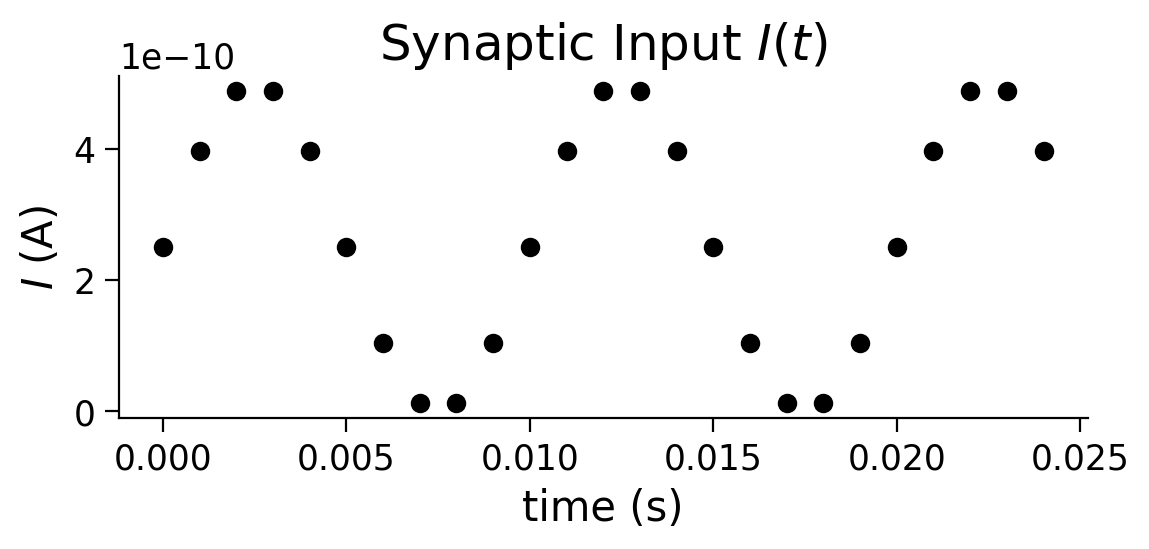

In [94]:
step_end = 25

plt.figure(figsize=(6, 3))
plt.title('Synaptic Input $I(t)$')
plt.xlabel('time (s)')
plt.ylabel('$I$ (A)')

for step in range(step_end):
    t = step * dt
    i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))
    plt.plot(t, i, 'ko')

plt.show()

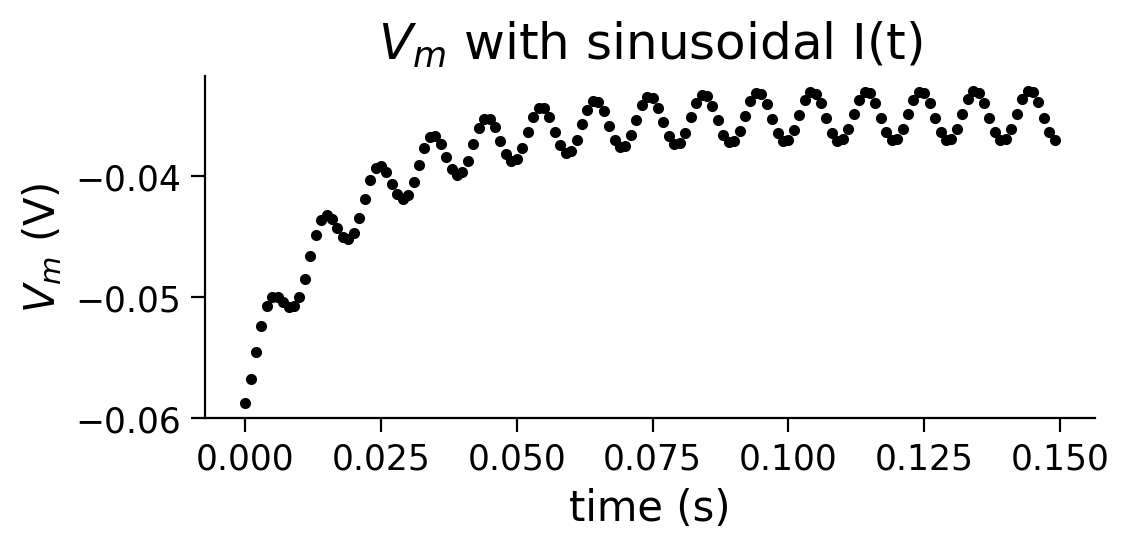

In [95]:
step_end = int(t_max / dt)
v = el

plt.figure(figsize=(6, 3))
plt.title('$V_m$ with sinusoidal I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

for step in range(step_end):
    t = step * dt
    i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))
    v = v + dt/tau * (el - v + r*i)
    plt.plot(t, v, 'k.')

plt.show()

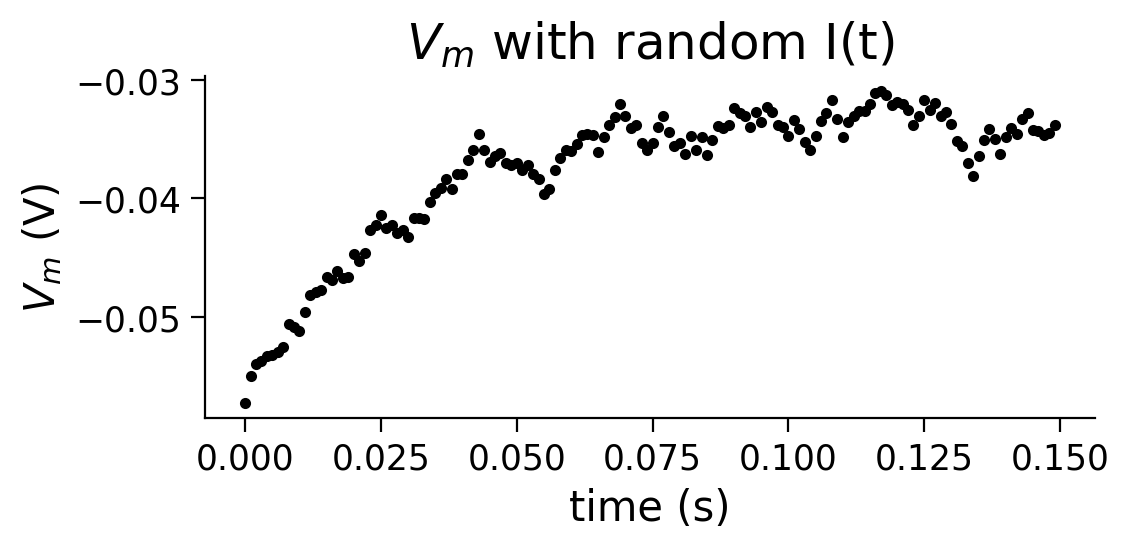

In [96]:
# Vanilla Implementation:
np.random.seed(2020)
step_end = int(t_max / dt)
v = el

plt.figure(figsize=(6, 3))
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

for step in range(step_end):
    t = step * dt
    random_num = 2 * np.random.random() - 1
    i =  i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * random_num)
    v = v + dt/tau * (el - v + r*i)
    plt.plot(t, v, 'k.')
    
plt.show()

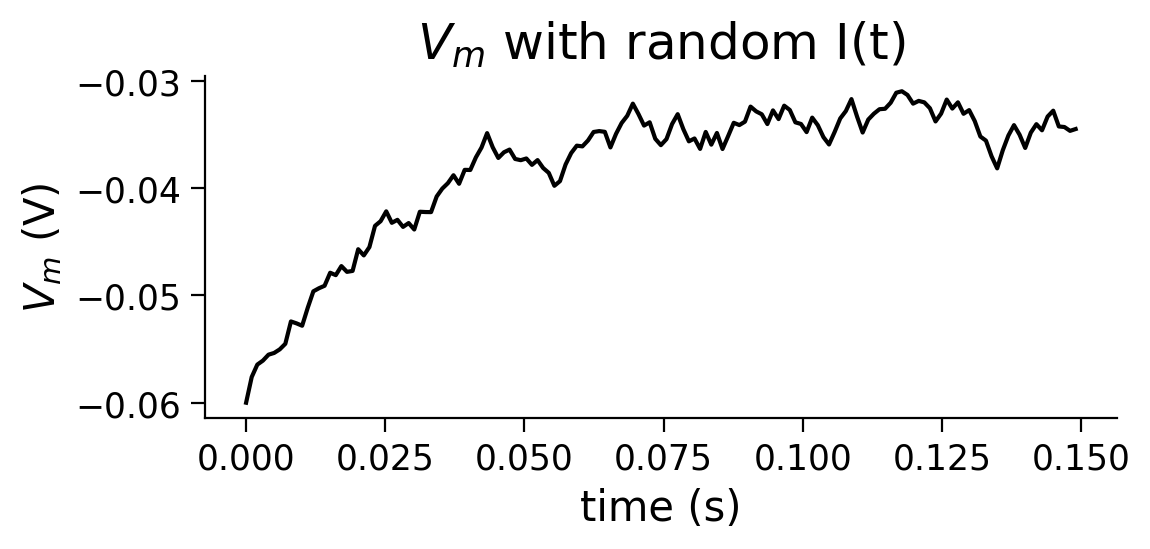

In [97]:
# Numpy Implementation: 
np.random.seed(2020)
step_end = int(t_max / dt) - 1
t_range = np.linspace(0, t_max, num=step_end, endpoint=False)
v = el * np.ones(step_end)

i = i_mean * (1 + 0.1 * (t_max/dt) ** (0.5) * (2 * np.random.random(step_end) - 1))

for step, i_step in enumerate(i):
    if step==0:
        continue

    v[step] = v[step - 1] + (dt / tau) * (el - v[step - 1] + r * i_step)

plt.figure(figsize=(6, 3))
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

plt.plot(t_range, v, 'k')
plt.show()

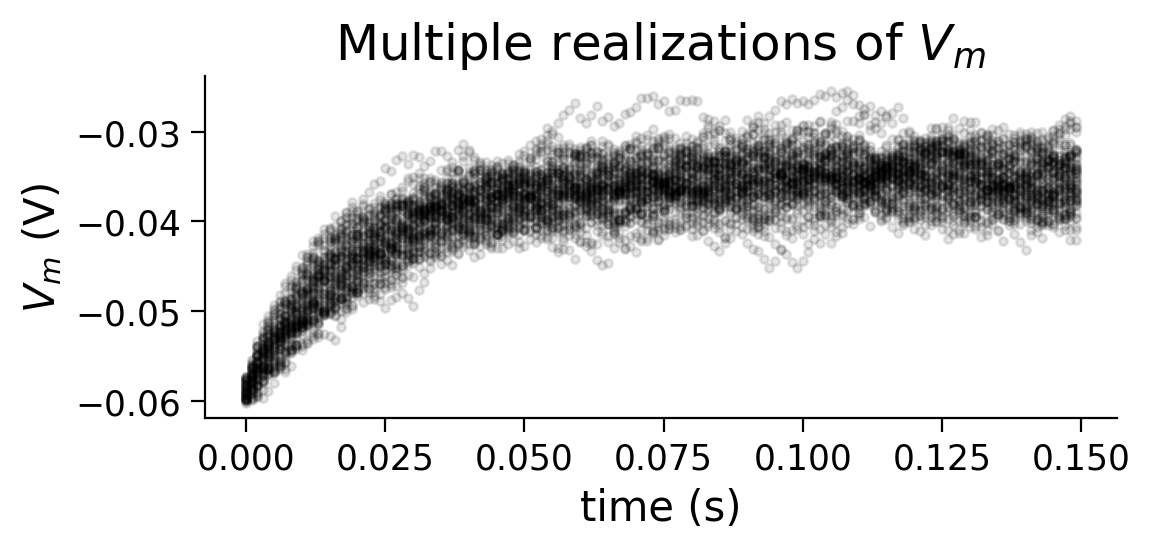

In [98]:
# Vanilla Implementation:
np.random.seed(2020)
step_end = int(t_max / dt)
n = 50
v_n = [el] * n

plt.figure(figsize=(6, 3))
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

for step in range(step_end):
    t = step * dt

    for j in range(0, n):
        i = i_mean * (1 + 0.1 * (t_max/dt)**(0.5) * (2* np.random.random() - 1))
        v_n[j] = v_n[j] + (dt / tau) * (el - v_n[j] + r*i)

    plt.plot([t] * n, v_n, 'k.', alpha=0.1)

plt.show()

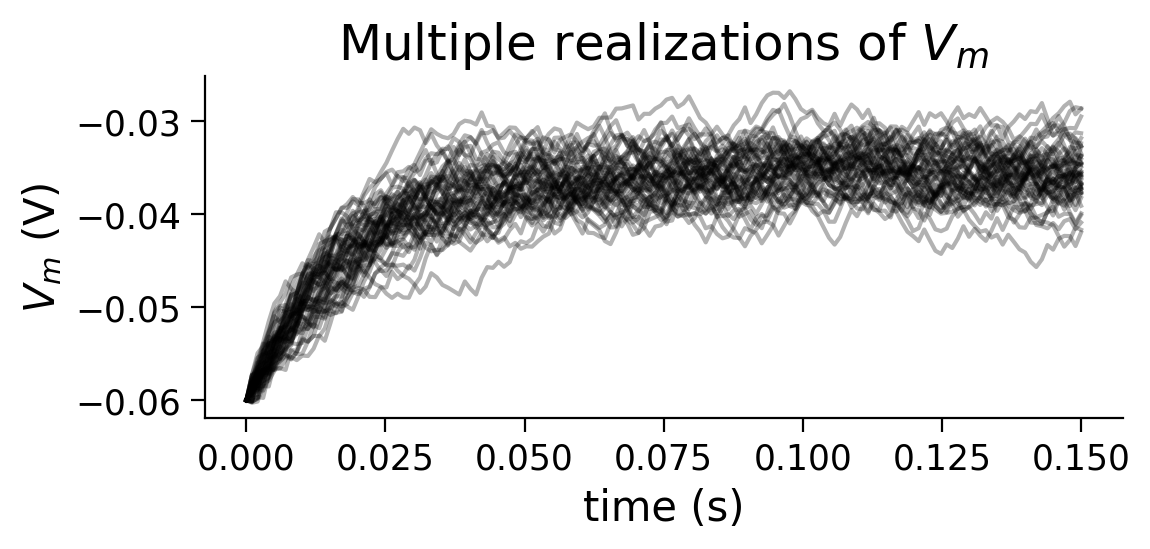

In [99]:
# Numpy Implementation: 
np.random.seed(2020)
step_end = int(t_max / dt)
n = 50
t_range = np.linspace(0, t_max, num=step_end)
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

for step in range(1, step_end):
   v_n[:, step] = v_n[:, step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r * i[:, step])

plt.figure(figsize=(6, 3))
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

plt.plot(t_range, v_n.T, 'k', alpha=0.3)
plt.show()

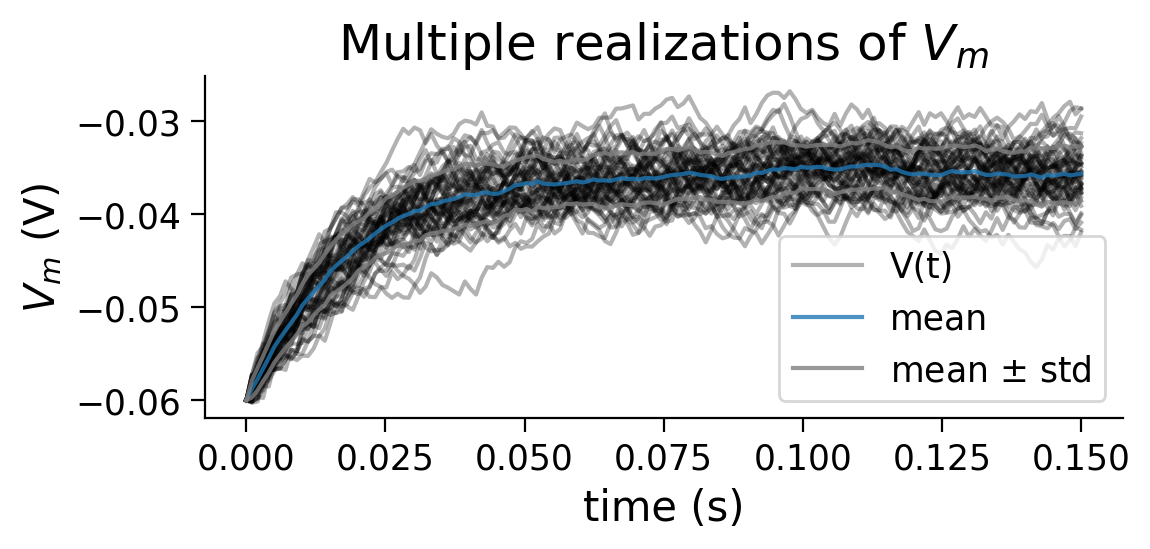

In [100]:
np.random.seed(2020)

step_end = int(t_max / dt)
n = 50
t_range = np.linspace(0, t_max, num=step_end)
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

for step in range(1, step_end):
    v_n[:, step] = v_n[:, step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r * i[:, step])

v_mean = np.mean(v_n, axis=0)
v_std = np.std(v_n, axis=0)

plt.figure(figsize=(6, 3))
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

plt.plot(t_range, v_n.T, 'k', alpha=0.3)
plt.plot(t_range, v_n[-1], 'k', alpha=0.3, label='V(t)')
plt.plot(t_range, v_mean, 'C0', alpha=0.8, label='mean')
plt.plot(t_range, v_mean+v_std, 'C7', alpha=0.8)
plt.plot(t_range, v_mean-v_std, 'C7', alpha=0.8, label='mean $\pm$ std')

plt.legend()
plt.show()

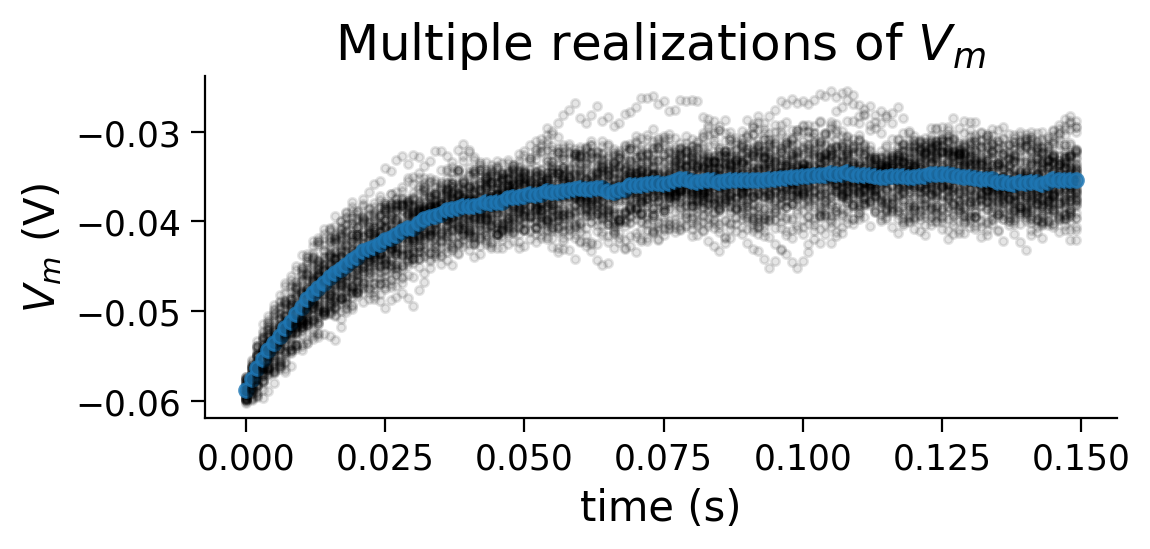

In [101]:
np.random.seed(2020)
step_end = int(t_max / dt)
n = 50
v_n = [el] * n

plt.figure(figsize=(6, 3))
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

for step in range(step_end):
    t = step * dt
    
    for j in range(0, n):
        i = i_mean * (1 + 0.1 * (t_max/dt)**(0.5) * (2* np.random.random() - 1))
        v_n[j] = v_n[j] + (dt / tau) * (el - v_n[j] + r*i)

    v_mean = sum(v_n) / n

    plt.plot(n*[t], v_n, 'k.', alpha=0.1)
    plt.plot(t, v_mean, 'C0.', alpha=0.8, markersize=10)

plt.show()

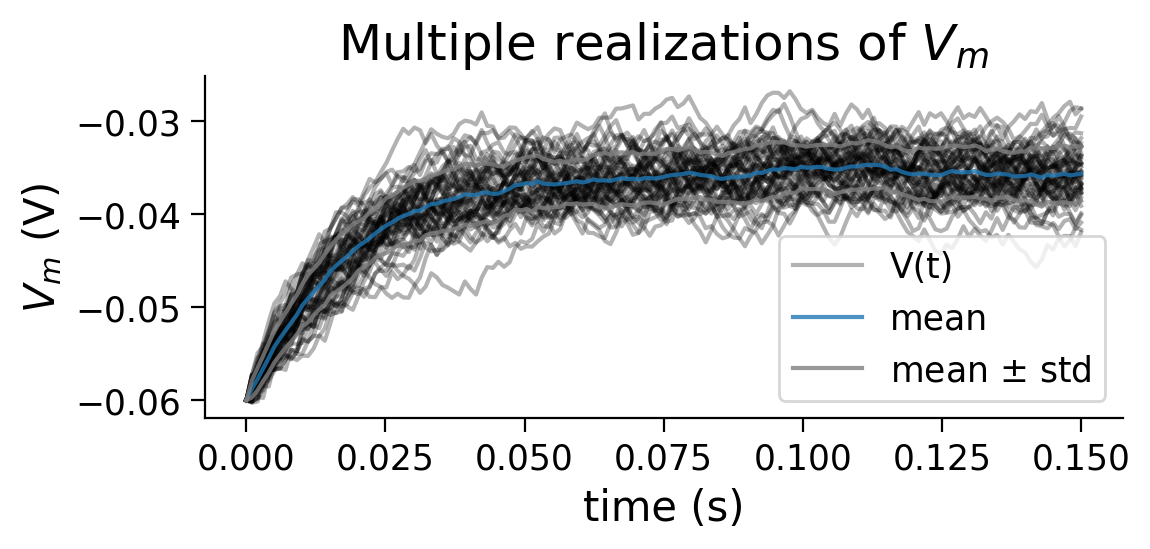

In [102]:
np.random.seed(2020)
step_end = int(t_max / dt)
n = 50
t_range = np.linspace(0, t_max, num=step_end)
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

for step in range(1, step_end):
      v_n[:, step] = v_n[:, step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r * i[:, step])

v_mean = np.mean(v_n, axis=0)
v_std = np.std(v_n, axis=0)

plt.figure(figsize=(6, 3))
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

plt.plot(t_range, v_n.T, 'k', alpha=0.3)
plt.plot(t_range, v_n[-1], 'k', alpha=0.3, label='V(t)')
plt.plot(t_range, v_mean, 'C0', alpha=0.8, label='mean')
plt.plot(t_range, v_mean+v_std, 'C7', alpha=0.8)
plt.plot(t_range, v_mean-v_std, 'C7', alpha=0.8, label='mean $\pm$ std')

plt.legend()
plt.show()

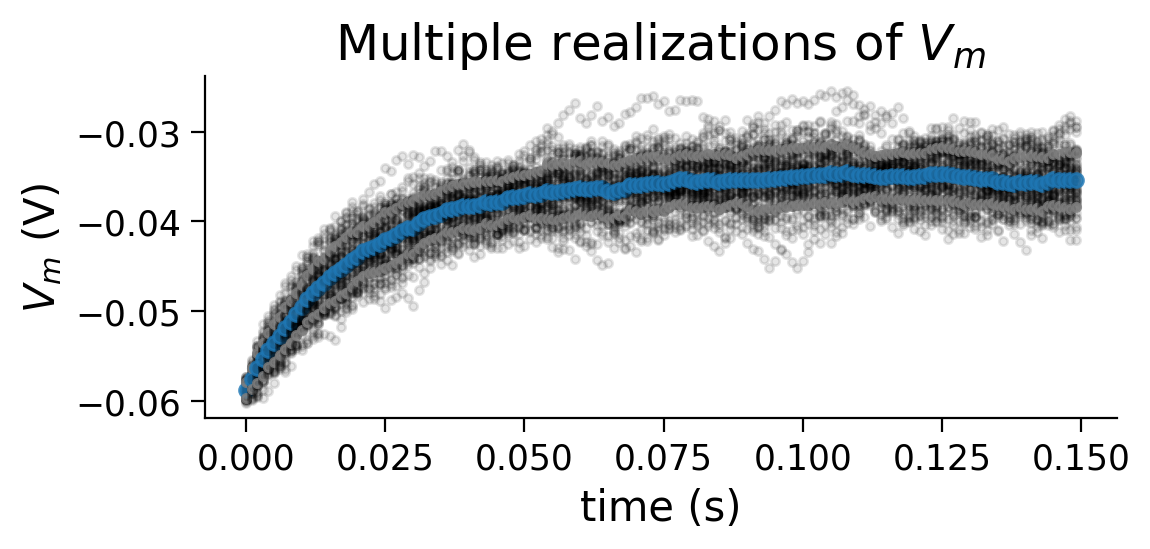

In [103]:
np.random.seed(2020)
step_end = int(t_max / dt)
n = 50
v_n = [el] * n

plt.figure(figsize=(6, 3))
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

for step in range(step_end):
    t = step * dt

    for j in range(0, n):
        i = i_mean * (1 + 0.1 * (t_max/dt)**(0.5) * (2* np.random.random() - 1))
        v_n[j] = v_n[j] + (dt / tau) * (el - v_n[j] + r*i)

    v_mean = sum(v_n) / n
    v_var_n = [(v - v_mean)**2 for v in v_n]
    v_var = sum(v_var_n) / (n - 1)
    v_std = np.sqrt(v_var)

    plt.plot(n*[t], v_n, 'k.', alpha=0.1)
    plt.plot(t, v_mean, 'C0.', alpha=0.8, markersize=10)
    plt.plot(t, v_mean + v_std, 'C7.', alpha=0.8)
    plt.plot(t, v_mean - v_std, 'C7.', alpha=0.8)

plt.show()

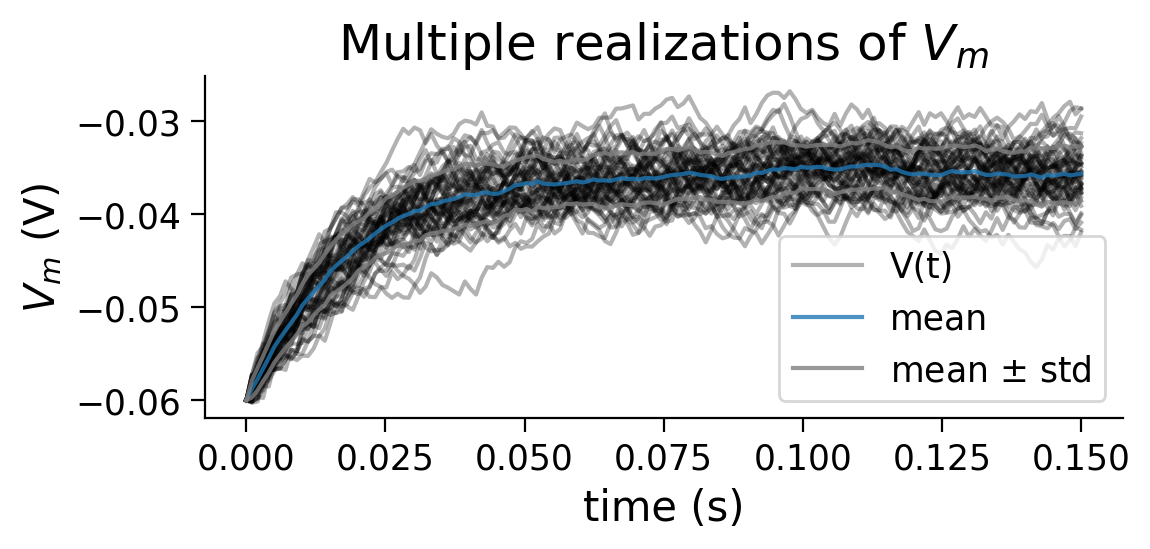

In [104]:
np.random.seed(2020)
step_end = int(t_max / dt)
n = 50
t_range = np.linspace(0, t_max, num=step_end)
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

for step in range(1, step_end):
    v_n[:, step] = v_n[:, step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r * i[:, step])

v_mean = np.mean(v_n, axis=0)
v_std = np.std(v_n, axis=0)

plt.figure(figsize=(6, 3))
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

plt.plot(t_range, v_n.T, 'k', alpha=0.3)

plt.plot(t_range, v_n[-1], 'k', alpha=0.3, label='V(t)')
plt.plot(t_range, v_mean, 'C0', alpha=0.8, label='mean')
plt.plot(t_range, v_mean+v_std, 'C7', alpha=0.8)
plt.plot(t_range, v_mean-v_std, 'C7', alpha=0.8, label='mean $\pm$ std')

plt.legend()
plt.show()